<h1>Content<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analysis-of-computer-game-sales" data-toc-modified-id="Analysis-of-computer-game-sales-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analysis of computer game sales</a></span></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preparation</a></span></li><li><span><a href="#Research-data-analysis" data-toc-modified-id="Research-data-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Research data analysis</a></span></li><li><span><a href="#Portrait-of-the-user-of-each-region" data-toc-modified-id="Portrait-of-the-user-of-each-region-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Portrait of the user of each region</a></span></li><li><span><a href="#Hypothesis-testing" data-toc-modified-id="Hypothesis-testing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Hypothesis testing</a></span></li><li><span><a href="#General-conclusion" data-toc-modified-id="General-conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>General conclusion</a></span></li></ul></div>

# Analysis of computer game sales

You work in the online store "Streamchik", which sells computer games all over the world. Historical data on game sales, user and expert ratings, genres and platforms (for example, Xbox or PlayStation) are available from open sources. You need to identify the patterns that determine the success of the game. This will allow you to bet on a potentially popular product and plan advertising campaigns.
Here is the data up to 2016. Let's imagine that it's December 2016, and you're planning a campaign for 2017. We need to work out the principle of working with data. It doesn't matter whether you forecast sales for 2017 according to 2016 data or 2027 according to 2026 data.

### General information

In [ ]:
# 1. Importing libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [ ]:
# 2. Upload the data to the dataframe from the link:

data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv', sep = ',')
display(data.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [ ]:
# 3. Let's study the general information about the received dataframe.

data.info() 
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

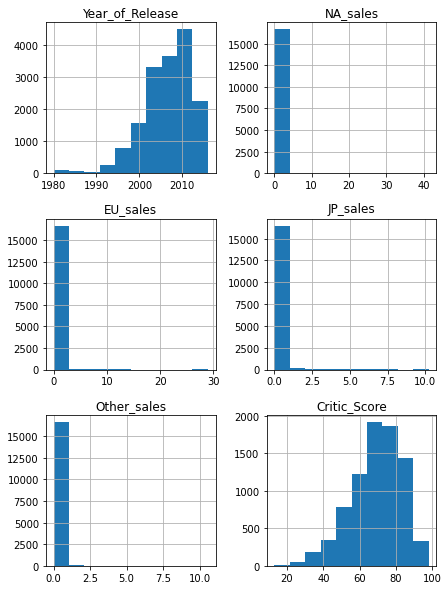

In [ ]:
# 4. Let's build histograms for all columns of the table.

data.hist(figsize=(7, 10));

<span style="color:blue">The dataframe in question has 11 columns and 16715 rows. There are gaps in a number of columns, which will be worked on below. It is advisable to change the data type of the "release date" column from float to int, since years are calculated in integers. It is advisable to change the data type of the "user rating" column from object to float, since in fact floating-point numbers are indicated in this column.</span>

### Data preparation

In [ ]:
# 1. We will reduce the column names to lowercase:

data.columns = data.columns.str.lower()
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<span style="color:blue">The names of all columns are now indicated in lowercase.</span>

In [ ]:
# 2. Let's change the data type in the "year of release" column to int, for which we first remove the gaps in the column:

data = data.dropna(subset = ['year_of_release'])
print(data.isna().sum())
data.info()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         6607
rating             6678
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(

<span style="color:blue">After removing the gaps in the "year of release" column, the number of rows in the dataframe decreased by 269 c16715 to 16446. After that, it became possible to change the data type of this column to int. </span>

In [ ]:
# Let's change the data type of the "year of release" column to int:

data['year_of_release'] = data['year_of_release'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Let's change the data type in the "user rating" column to float, 
# for which we first look at what data is in the column
# and whether they will prevent changing the data type:

print(data['user_score'].value_counts(dropna=False))
print(data['user_score'].isna().sum())

NaN    6607
tbd    2376
7.8     322
8       285
8.2     276
       ... 
1.9       2
9.6       2
0.9       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64
6607


<span style="color:blue">In the "user rating" column, in addition to 6607 omissions, there are also 2376 values of "tbd", which apparently means "to be determined" ("to be determined"). So that in the future, when working with the column, all omissions are perceived the same, it is advisable to replace the values of "tbd" with NaN omissions.</span>

In [ ]:
# Replace the "tbd" values in the "user rating" column with NaN and change the data type to float:

data['user_score'] = data['user_score'].replace('tbd', 'NaN').astype('float64')
print(data.isna().sum())
data.info()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(

<span style="color:blue">After replacing the "tbd" values in the "user rating" column with NaN, the NaN omissions in the column became 8983 (6607 + 2376). It is impractical to replace these omissions with something (average, median), because the "user rating" column contains subjective user ratings, and any replacement can lead to data distortion. It is impractical to delete lines with these omissions due to their large number.</span>

In [ ]:
# 3. We will process the remaining gaps, except for those that were eliminated when changing data types.

data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

<span style="color:blue">Among the passes there were two passes in the columns "title" and "genre", as well as passes in the columns with ratings.</span>

In [ ]:
# Delete the rows with omissions in the "name" column:

data = data.dropna(subset = ['name'])
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

<span style="color:blue">The two omissions in the "name" column have disappeared. Also, two passes in the "genre" column disappeared along with them.</span>

In [ ]:
# Let's see what data is in the columns "critics' rating" and "ESRB rating":

print(data['critic_score'].unique())
print(data['rating'].unique())
print(data['rating'].value_counts())
print(data.isna().sum())

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 41. 36. 31.
 27. 35. 26. 19. 28. 23. 24. 21. 17. 13.]
['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64


<span style="color:blue">In the "critic's score" column, the number of "nan" passes is 8461, and in the "rating" column - 6676. We will not replace them by analogy with the data in the "user rating" column, because this is subjective data and any replacement of them can lead to data distortion. It is impractical to delete lines with these omissions due to their large number. In the "rating" column, it is advisable to replace the K-A rating, which according to Wikipedia (https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board ) was used until 1999, for the E rating, which replaced it.</span>

In [ ]:
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'
data['rating'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


E       3924
T       2905
M       1536
E10+    1393
EC         8
AO         1
RP         1
Name: rating, dtype: int64

<span style="color:blue">Three games with a K-A rating joined the E rating, the last became 3924 pcs.</span>

In [ ]:
# 4. Let's calculate the total sales in all regions and write them in a separate column:

data['sum_sales'] =  data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis='columns')
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [ ]:
# 5. Let's check the dataframe for duplicates in the part of matching game names 
# on the same platforms:

data.duplicated(subset=['name','platform']).value_counts()

False    16441
True         3
dtype: int64

<span style="color:blue">The dataframe contains three duplicates in the titles of games released on the same platform.</span>

In [ ]:
# We will remove the detected duplicates in the names of games on the same platform:
data = data.drop_duplicates(subset=['name','platform'], keep = 'first')
print(data.duplicated(subset=['name','platform']).value_counts())

False    16441
dtype: int64


<span style="color:blue">Duplicates have been deleted. In the remaining columns, it makes no sense to search for duplicates singly or in pairs, because the dataframe lists games on all platforms, respectively, there will be many repetitions both in the names of the games themselves, and in the names of games together with genres, and in the names of games together with the year of release.</span>

<span style="color:blue">

Based on the results of data preprocessing:
- column names are reduced to lowercase;
- the data type in the "year of release" column has been replaced with int, and before that, the rows with omissions in this column have been deleted;
- the data type in the "user rating" column was changed to float, and before that the "tbd" values were replaced with NaN, the omissions in this column were not replaced due to the subjectivity of the data in these columns and the impracticability of replacing them with average, median, etc., and were not deleted due to the large number of rows with omissions;
- two lines with omissions in the columns "title" and "genre" have been removed from the dataframe;
- in the columns "critic's score" and "rating", the omissions were not replaced due to the subjectivity of the data in these columns and the impracticability of replacing them with the average, median, etc., and were not deleted due to the large number of rows with omissions;
- in the "rating" column, the K-A rating has been replaced by E, since the K-A rating was used until 1999, it was replaced by the E rating;
- added a column with total sales for each game across all regions;
- removed three duplicates in the names of games released on the same platform.

The occurrence of omissions in the dataframe can be explained as follows:

- in the column "year of release" - for example, due to the lack of data from the filling;
- in the columns "title" and "genre" - possibly due to a placeholder error;
- in the columns "user rating", "critic rating", "rating" - if we are talking about less new games, then they could not get to the evaluation, if we are talking about new games, they could not have time to assign ratings at the time of compiling the dataframe.
</span>

### Research data analysis

In [ ]:
# 1. Let's see how many games were released in different years, for which we 
# first discard from the dataframe all duplicates in the names of the same games 
# released on different platforms:

data.duplicated(subset=['name','year_of_release']).value_counts()

False    12195
True      4246
dtype: int64

<span style="color:blue">In total, there are 4246 duplicates in the dataframe in the names of the same games, but released on different platforms.</span> 

In [ ]:
# Discard these duplicates and save the new dataframe to the variable data_unique_games:
data_unique_games = data.drop_duplicates(subset=['name','year_of_release'], keep = 'first')
data_unique_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12195 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             12195 non-null  object 
 1   platform         12195 non-null  object 
 2   year_of_release  12195 non-null  int64  
 3   genre            12195 non-null  object 
 4   na_sales         12195 non-null  float64
 5   eu_sales         12195 non-null  float64
 6   jp_sales         12195 non-null  float64
 7   other_sales      12195 non-null  float64
 8   critic_score     5174 non-null   float64
 9   user_score       4736 non-null   float64
 10  rating           6286 non-null   object 
 11  sum_sales        12195 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.2+ MB


<span style="color:blue">There are 12195 lines in the new dataframe.</span> 

In [ ]:
# Let's see the number of games released by year:
display(data_unique_games.groupby('year_of_release')['name'].count())

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      40
1992      41
1993      59
1994     117
1995     215
1996     258
1997     282
1998     364
1999     326
2000     325
2001     428
2002     631
2003     546
2004     550
2005     657
2006     773
2007     884
2008    1039
2009    1001
2010     900
2011     779
2012     446
2013     335
2014     319
2015     362
2016     297
Name: name, dtype: int64

<span style="color:blue">Until 1998, fewer than 300 games were released annually.</span> 

In [ ]:
# We will cut off data from the dataframe up to and including 1997, saving the 
# dataset for all years in the data_full variable:

data_full = data
data = data.loc[data['year_of_release'] >= 1998]
print(data['year_of_release'].unique())

[2006 2008 2009 2005 1999 2007 2010 2013 2004 2002 2001 2011 1998 2015
 2012 2014 2016 2003 2000]


In [ ]:
# 2. Let's look at the platforms with the highest total sales for the period from 1998 to 2016:

display(data.groupby('platform')['sum_sales'].sum().sort_values(ascending = False))

platform
PS2     1233.56
X360     959.99
PS3      931.33
Wii      891.18
DS       802.76
PS       454.72
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
XB       251.57
PC       213.64
GC       196.73
XOne     159.32
N64      144.41
GB        93.90
WiiU      82.19
PSV       53.81
DC        15.95
SAT        3.91
WS         1.42
SNES       0.48
Name: sum_sales, dtype: float64

<span style="color:blue">Since 1998, fifteen platforms have had total sales of more than 100 million copies, the largest total sales of platforms: PS2, X360, PS3, Wii, DS.</span>

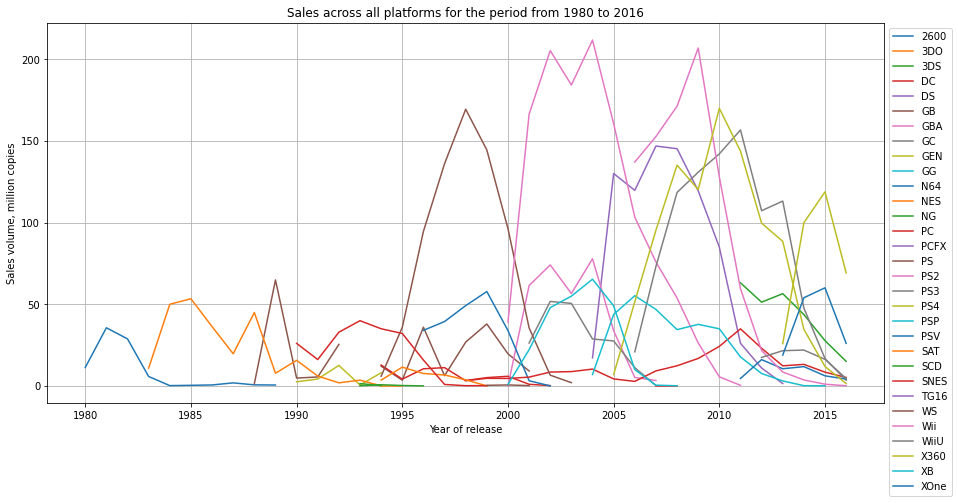

In [ ]:
# To estimate the time of the appearance of new and exit from the market of old platforms, 
# we will plot the distribution of sales across all platforms for all years using the variable data_full:

data_full.pivot_table(index='year_of_release', 
                      columns = 'platform', 
                      values='sum_sales',
                      aggfunc='sum').plot(grid=True, figsize=(15, 7));
plt.title("Sales across all platforms for the period from 1980 to 2016");
plt.legend(bbox_to_anchor=(1, 1));
plt.xlabel("Year of release");
plt.ylabel("Sales volume, million copies");

<span style="color:blue">In the period from 1988 to 2006, new platforms appeared almost every year, after 2006, two platforms appeared in 2011 and 2013. The peak of the platforms' exit from the market occurred in the period from 1999 to 2003 - 6 platforms left, 3 platforms left before 1999, and 4 platforms left after 2003.</span>

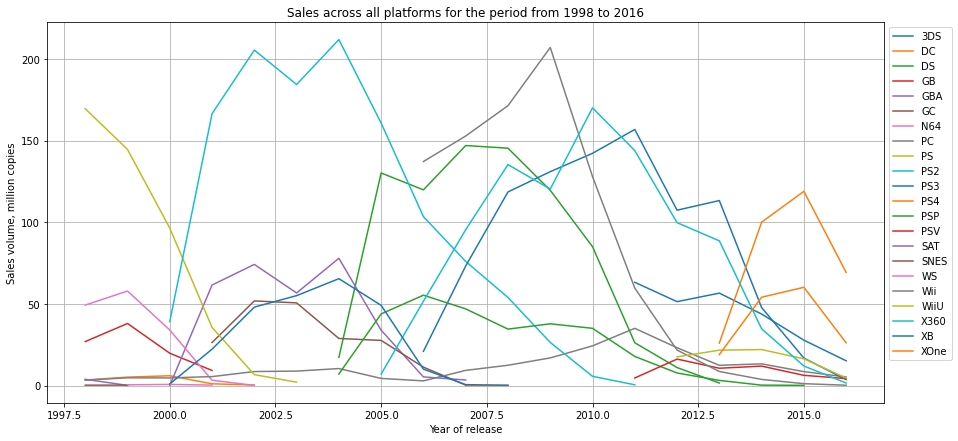

In [ ]:
# 3. We will determine the current sales period, based on which we will make a forecast, 
# for which we will once again build a sales schedule for all platforms, 
# but already for the period from 1998 to 2016:

data.pivot_table(index='year_of_release', 
                 columns = 'platform', 
                 values='sum_sales', 
                 aggfunc='sum').plot(grid=True, figsize=(15, 7));
plt.title("Sales across all platforms for the period from 1998 to 2016");
plt.legend(bbox_to_anchor=(1, 1));
plt.xlabel("Year of release");
plt.ylabel("Sales volume, million copies");
plt.show()

<span style="color:blue">Taking into account that the task of the work is to plan sales for 2017 (i.e. for the future compared to the time of compiling the dataframe), and taking into account that sales for a number of platforms fell to zero before 2014, i.e. a number of platforms went out of circulation, and also taking into account that starting from 2014 there is a clear general trend towards falling sales of computer games across all platforms, it is most expedient to analyze future sales according to sales data for the period from 2014 to 2016.</span>

In [ ]:
# 4. We will discard all data from the dataframe until 2014, in the future the period 
# from 2014 to 2016 will be used for analysis:

data = data.loc[data['year_of_release'] >= 2014]
data['year_of_release'].unique()

array([2015, 2014, 2016])

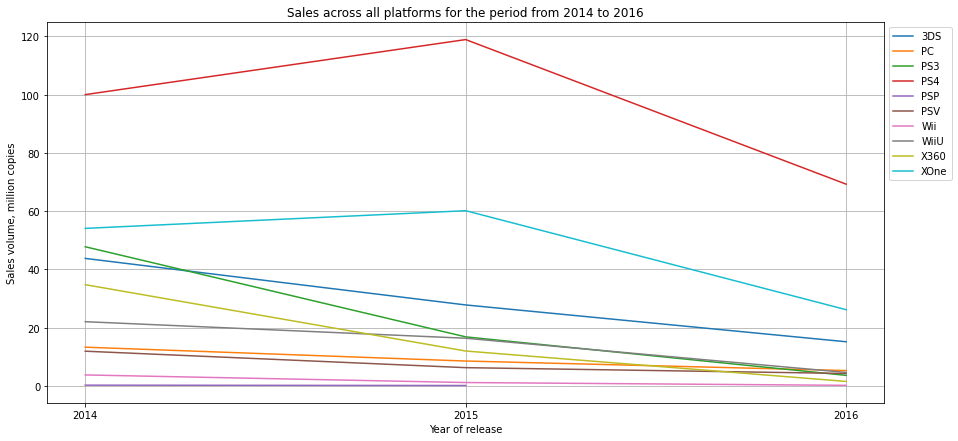

sum_sales
platform year_of_release           
3DS      2014                 43.76
         2015                 27.78
         2016                 15.14
PC       2014                 13.28
         2015                  8.52
         2016                  5.25
PS3      2014                 47.76
         2015                 16.82
         2016                  3.60
PS4      2014                100.00
         2015                118.90
         2016                 69.25
PSP      2014                  0.24
         2015                  0.12
PSV      2014                 11.90
         2015                  6.25
         2016                  4.25
Wii      2014                  3.75
         2015                  1.14
         2016                  0.18
WiiU     2014                 22.03
         2015                 16.35
         2016                  4.60
X360     2014                 34.74
         2015                 11.96
         2016                  1.52
XOne     2014                 54.07
         2015                 60.14
         2016                 26.15

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           940 non-null    object 
 11  sum_sales        1689 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 171.5+ KB


In [ ]:
# 5. Let's build a summary table and a sales schedule for all platforms for the period from 2014 to 2016:

data.pivot_table(index='year_of_release', 
                 columns = 'platform', 
                 values='sum_sales', 
                 aggfunc='sum').plot(grid=True, figsize=(15, 7))
plt.title("Sales across all platforms for the period from 2014 to 2016");
plt.legend(bbox_to_anchor=(1, 1));
plt.xlabel("Year of release");
plt.ylabel("Sales volume, million copies");
plt.xticks([2014,2015,2016])
plt.show()
display(data.groupby(['platform','year_of_release']).agg({'sum_sales': 'sum'}))
data.info()

<span style="color:blue">For the period from 2014 to 2016, there is a general trend of falling sales volumes on all platforms. At the end of 2016, three platforms are leading in terms of sales: PS4, XOne, 3DS, and the PS4 platform is significantly ahead of the other two. Sales volumes of each of the three platforms at the end of 2016 exceed 15 million games. These platforms can be considered potentially profitable.</span>

In [ ]:
# Let's save a slice of the potentially profitable platforms we have identified above into the data_top 3 variable:

data_top3 = data.query("platform == ['PS4', 'XOne', '3DS']")
data_top3['platform'].unique()

array(['PS4', '3DS', 'XOne'], dtype=object)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


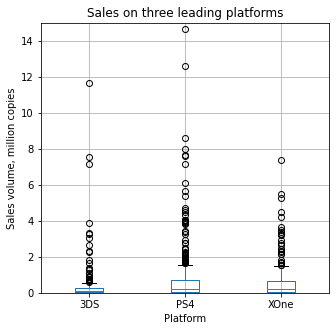

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


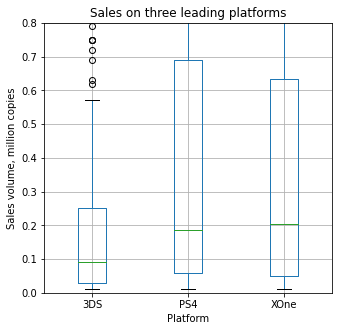

In [ ]:
# 6. Let's plot the charts of the scope of the total sales volume for the three leading platforms 
# for the period from 2014 to 2016 with different values on the Y axis:

data_top3.boxplot(column='sum_sales', by='platform', figsize=(5, 5)).set_ylim(0, 15);
plt.title("Sales on three leading platforms")
plt.suptitle('')
plt.xlabel("Platform");
plt.ylabel("Sales volume, million copies");
plt.show()
data_top3.boxplot(column='sum_sales', by='platform', figsize=(5, 5)).set_ylim(0, 0.8);
plt.title("Sales on three leading platforms");
plt.suptitle('')
plt.xlabel("Platform");
plt.ylabel("Sales volume, million copies");
plt.show()

<span style="color:blue">On the PS4 and XOne platforms, the medians, the first and third quartiles, the boundaries of the upper and lower "whiskers" are located at approximately the same value. For the 3DS platform, the median and the first quartile are slightly lower, and the third quartile and the upper "mustache" are significantly lower than for the PS4 and XOne platforms, apparently due to lower sales volumes on this platform. However, a large number of emissions are observed on all three platforms, while on the PS4 platform there are significantly more of them than on other platforms. The outliers are probably successful games in terms of sales.</span>

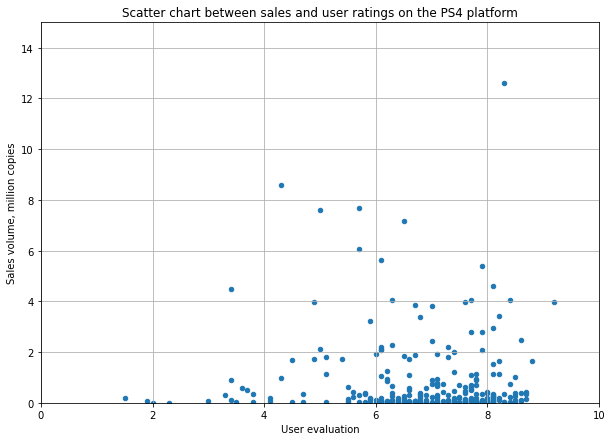

-0.040131589472697356


In [ ]:
# 7. Let's build a scatter plot and determine the correlation coefficient 
# between sales and user ratings for the most successful PS4 platform:

data[data['platform'] == 'PS4'].plot(x='user_score', 
                                     y='sum_sales', 
                                     kind='scatter', 
                                     figsize=(10, 7), 
                                     xlim=(0, 10), 
                                     ylim=(0, 15), 
                                     grid = True);
plt.title("Scatter chart between sales and user ratings on the PS4 platform")
plt.xlabel("User evaluation");
plt.ylabel("Sales volume, million copies");
plt.show()
print(data[data['platform'] == 'PS4']['user_score'].corr(data[data['platform'] == 'PS4']['sum_sales']))

<span style="color:blue">The main spread of sales values is concentrated between a rating of 5.5 and 9, while the correlation coefficient differs little from zero, so the correlation between sales and user ratings is weakly negative.</span>

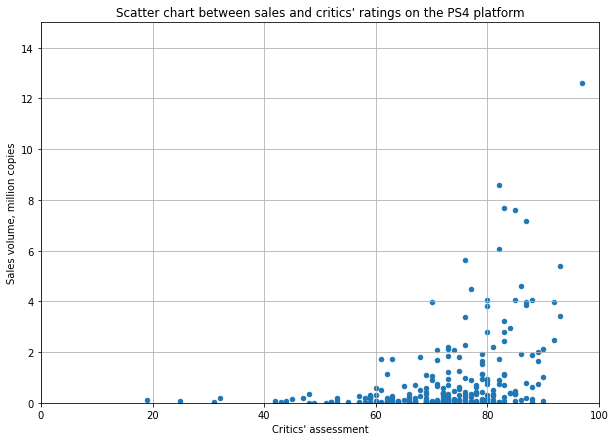

0.40266141068104083


In [ ]:
# Let's build a scatter plot and determine the correlation coefficient between sales 
# and critics' ratings for the most successful PS4 platform:

data[data['platform'] == 'PS4'].plot(x='critic_score', 
                                     y='sum_sales', 
                                     kind='scatter', 
                                     figsize=(10, 7), 
                                     xlim=(0, 100), 
                                     ylim=(0, 15), 
                                     grid = True)
plt.title("Scatter chart between sales and critics' ratings on the PS4 platform")
plt.xlabel("Critics' assessment");
plt.ylabel("Sales volume, million copies");
plt.show()
print(data[data['platform'] == 'PS4']['critic_score'].corr(data[data['platform'] == 'PS4']['sum_sales']))

<span style="color:blue">The correlation between the sales volume on the PS4 platform and the critics' assessment is weakly positive.</span>

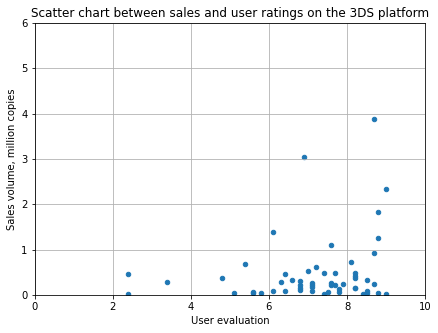

0.2151932718527028



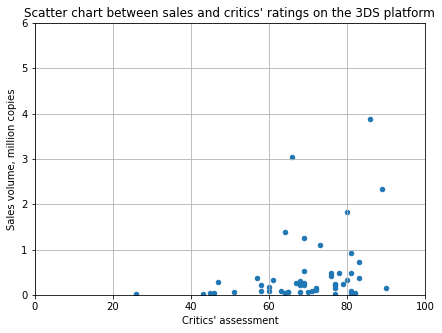

0.314117492869051


In [ ]:
# 8. Let's correlate the conclusions on the PS4 platform with the sales of games 
# on the '3DS', 'XOne' platforms from three profitable platforms, for which we will build 
# scattering diagrams and determine the correlation coefficients:

data[data['platform'] == '3DS'].plot(x='user_score', 
                                     y='sum_sales', 
                                     kind='scatter', 
                                     figsize=(7, 5), 
                                     xlim=(0, 10), 
                                     ylim=(0, 6), 
                                     grid = True);
plt.title("Scatter chart between sales and user ratings on the 3DS platform")
plt.xlabel("User evaluation");
plt.ylabel("Sales volume, million copies");
plt.show()
print(data[data['platform'] == '3DS']['user_score'].corr(data[data['platform'] == '3DS']['sum_sales']))
print()
data[data['platform'] == '3DS'].plot(x='critic_score', 
                                     y='sum_sales', 
                                     kind='scatter', 
                                     figsize=(7, 5), 
                                     xlim=(0, 100), 
                                     ylim=(0, 6), 
                                     grid = True);
plt.title("Scatter chart between sales and critics' ratings on the 3DS platform")
plt.xlabel("Critics' assessment");
plt.ylabel("Sales volume, million copies");
plt.show()
print(data[data['platform'] == '3DS']['critic_score'].corr(data[data['platform'] == '3DS']['sum_sales']))

<span style="color:blue">Unlike the PS4 platform, the correlation between the sales volume on the 3DS platform and the user rating is weakly positive, the correlation with the critics' rating is also weakly positive.</span>

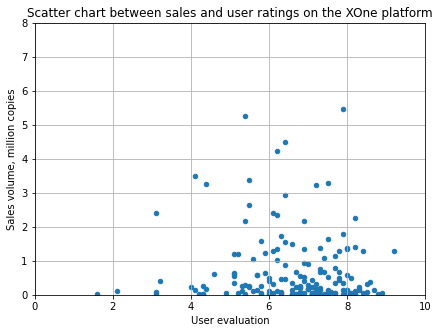

-0.0703839280647581



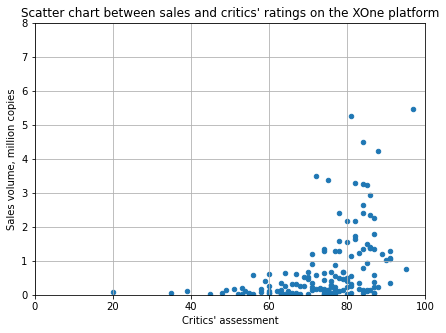

0.42867694370333226


In [ ]:
# Let's build scattering diagrams and determine the correlation coefficients for the XOne platform:

data[data['platform'] == 'XOne'].plot(x='user_score', 
                                      y='sum_sales', 
                                      kind='scatter', 
                                      figsize=(7, 5), 
                                      xlim=(0, 10), 
                                      ylim=(0, 8), 
                                      grid = True);
plt.title("Scatter chart between sales and user ratings on the XOne platform")
plt.xlabel("User evaluation");
plt.ylabel("Sales volume, million copies");
plt.show()
print(data[data['platform'] == 'XOne']['user_score'].corr(data[data['platform'] == 'XOne']['sum_sales']))
print()
data[data['platform'] == 'XOne'].plot(x='critic_score', 
                                      y='sum_sales', 
                                      kind='scatter', 
                                      figsize=(7, 5), 
                                      xlim=(0, 100), 
                                      ylim=(0, 8), 
                                      grid = True);
plt.title("Scatter chart between sales and critics' ratings on the XOne platform")
plt.xlabel("Critics' assessment");
plt.ylabel("Sales volume, million copies");
plt.show()
print(data[data['platform'] == 'XOne']['critic_score'].corr(data[data['platform'] == 'XOne']['sum_sales']))

<span style="color:blue">Similarly with the PS4, the correlation between sales on the XOne platform and user reviews is weakly negative, with critics' assessment - weakly positive.</span>

In [ ]:
# 9. Let's look at the general distribution of games by genre in the period 2014-2016:

display(data.groupby('genre')['genre'].count().sort_values(ascending = False).reset_index(name='count'))
print()
display(data.groupby('genre')['sum_sales'].median().sort_values(ascending = False).reset_index(name='sales_median'))

,genre,count
0,Action,619
1,Role-Playing,221
2,Adventure,185
3,Sports,161
4,Shooter,128
5,Misc,113
6,Racing,69
7,Fighting,60
8,Simulation,44
9,Platform,38


,genre,sales_median
0,Shooter,0.515
1,Sports,0.180
2,Platform,0.140
3,Fighting,0.125
4,Role-Playing,0.110
5,Simulation,0.100
6,Action,0.090
7,Misc,0.090
8,Racing,0.090
9,Strategy,0.060


<span style="color:blue">Most games were produced in the Action genre. In second and third place - RPG and Adventure. In terms of median sales, games with the Shooter genre are leading by a significant margin from others, followed by games with the Sports genre and Platform. These are potentially lucrative game genres.</span>

### Portrait of the user of each region

In [ ]:
# 1. We will determine the most popular platforms (top 5) for the user of each region (NA, EU, JP):

display(data.groupby('platform')['na_sales']
      .sum()
      .sort_values(ascending = False)
      .reset_index(name='NA_sales'))
print()
display(data.groupby('platform')['eu_sales']
      .sum()
      .sort_values(ascending = False)
      .reset_index(name='EU_sales'))
print()
display(data.groupby('platform')['jp_sales']
      .sum()
      .sort_values(ascending = False)
      .reset_index(name='JP_sales'))

,platform,NA_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05
5,WiiU,19.36
6,PC,7.23
7,PSV,2.52
8,Wii,2.08
9,PSP,0.00


,platform,EU_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12
5,X360,15.49
6,WiiU,13.15
7,PSV,3.53
8,Wii,2.59
9,PSP,0.00


,platform,JP_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31
5,PSP,0.36
6,XOne,0.32
7,X360,0.08
8,PC,0.00
9,Wii,0.00


<span style="color:blue">In North America, the top 5 platforms are: PS4, XOne, X360, 3DS, PS3. The first two platforms are leading by a clear advantage. In Europe, the top 5 includes PS4, XOne, PS3, PC, 3DS, PS4 has an even greater advantage than in North America, the sales volume on the second-ranked XOne is two times lower than in North America. In Japan, the 3DS platform is the leader in sales, followed by PS4, PSV, PS3 and WiiU. Sony's platform, which ranks second in popularity in North America and Europe, is not popular at all in Japan.</span>

In [ ]:
# 2. Let's define the most popular genres (top 5) for the user of each region (NA, EU, JP):

display(data.groupby('genre')['na_sales']
        .sum()
        .sort_values(ascending = False)
        .reset_index(name='NA_sales'))
print()
display(data.groupby('genre')['eu_sales']
        .sum()
        .sort_values(ascending = False)
        .reset_index(name='EU_sales'))
print()
display(data.groupby('genre')['jp_sales']
        .sum()
        .sort_values(ascending = False)
        .reset_index(name='JP_sales'))

,genre,NA_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05
5,Fighting,12.43
6,Racing,8.74
7,Platform,6.79
8,Adventure,5.64
9,Simulation,2.63


,genre,EU_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Racing,14.13
5,Misc,12.86
6,Simulation,7.30
7,Platform,6.80
8,Fighting,6.69
9,Adventure,6.49


,genre,JP_sales
0,Role-Playing,31.16
1,Action,29.58
2,Fighting,6.37
3,Misc,5.61
4,Shooter,4.87
5,Adventure,3.60
6,Sports,3.26
7,Platform,2.69
8,Simulation,2.31
9,Racing,1.76


<span style="color:blue">In North America, the Shooter genre accounted for the most sales, with Action in second place, followed by Sports, RPG and mixed genre games (Misc). In Europe, on the contrary, the Action genre is the most popular, and the Shooter is in second place, followed by Sports, RPG and Racing. In Japan, the two obvious sales leaders are RPG and Action games, followed by Fighting games, mixed genre games and Shooters by a significant margin.</span>

In [ ]:
# 3. Let's determine whether the ESRB rating affects sales in a particular region, 
# for which we will first process the omissions in the "rating" column:

data['rating'].value_counts(dropna=False)
data['rating'] = data['rating'].fillna("No rating")
data['rating'].isna().sum()

0

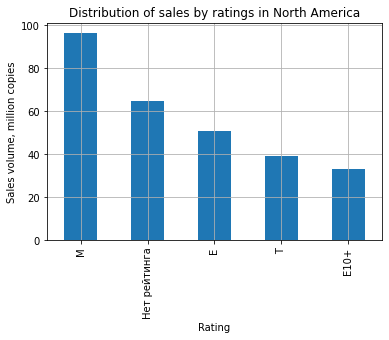

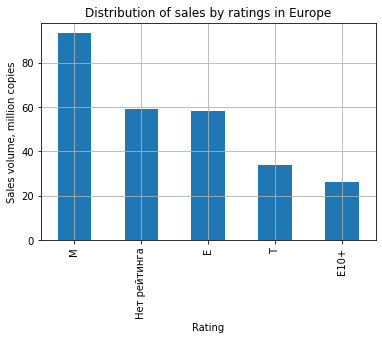

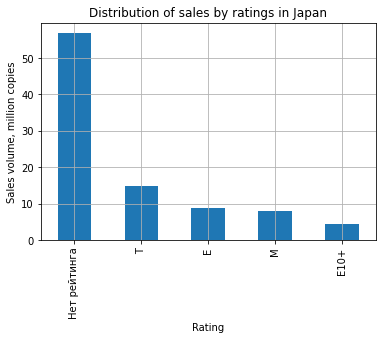

In [ ]:
# Let's build vertical graphs:

(
data.groupby('rating')['na_sales']
    .sum().sort_values(ascending=False)
    .plot(x = 'rating', 
          y = 'na_sales', 
          kind = 'bar', 
          figsize=(6,4), 
          grid=True, 
          title = 'Distribution of sales by ratings in North America')
)
plt.xlabel("Rating");
plt.ylabel("Sales volume, million copies");
plt.show()
(
data.groupby('rating')['eu_sales']
    .sum()
    .sort_values(ascending=False)
    .plot(x = 'rating', 
          y = 'eu_sales', 
          kind = 'bar', 
          figsize=(6,4), 
          grid=True, 
          title = 'Distribution of sales by ratings in Europe')
)
plt.xlabel("Rating");
plt.ylabel("Sales volume, million copies");
plt.show()
(
data.groupby('rating')['jp_sales']
    .sum().sort_values(ascending=False)
    .plot(x = 'rating', 
          y = 'jp_sales', 
          kind = 'bar', 
          figsize=(6,4), 
          grid=True, 
          title = 'Distribution of sales by ratings in Japan')
)
plt.xlabel("Rating");
plt.ylabel("Sales volume, million copies");
plt.show()

<span style="color:blue">The distribution of sales by ratings in the USA and Europe is approximately the same: games with a rating of M ("for adults") are in the lead, then games without a rating are in descending order, then ratings of E ("for everyone"), T ("for teenagers") and E10+ ("For everyone from 10 years and older"). In Japan, games without a rating are leading in sales, followed by games with a rating of T ("teenagers"), E ("for everyone") and only in fourth place games with a rating of M ("for adults"), which is leading in the United States and Europe, in fifth place games with a rating E10+ ("For everyone 10 years and older"). In Japan, the popularity of games without a rating may be explained by strict control over compliance with the rating by the players, so games without a rating are the most accessible for the Japanese.</span>

### Hypothesis testing

In [ ]:
# 1. Let's test the hypothesis that the average user ratings of the Xbox One and PC platforms are the same:

user_score_XOne = data.loc[(data['platform'] == 'XOne') & (~data['user_score'].isnull())]['user_score']
user_score_PC = data.loc[(data['platform'] == 'PC') & (~data['user_score'].isnull())]['user_score']
alpha = .05
results = st.ttest_ind(user_score_XOne, user_score_PC)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("It was not possible to reject the null hypothesis")

p-value: 0.10450507919348415
It was not possible to reject the null hypothesis


<span style="color:blue">Null hypothesis H0: The average user ratings of the Xbox One and PC platforms are the same. Alternative hypothesis H1: The average user ratings of the Xbox One and PC platforms are not equal to each other. The T-test data showed that the null hypothesis could not be rejected, and the average user ratings of the Xbox One and PC platforms are the same. A t-test was used to test hypotheses, because sufficiently large and equal-sized samples are compared and there is no reason to think that the variances of these aggregates are different.</span>

In [ ]:
# 2. Let's test the hypothesis that the average user ratings of the Action and Sports genres are different:

user_score_Action = data.loc[(data['genre'] == 'Action') & (~data['user_score'].isnull())]['user_score']
user_score_Sports = data.loc[(data['genre'] == 'Sports') & (~data['user_score'].isnull())]['user_score']
alpha = .05
results = st.ttest_ind(user_score_Action, user_score_Sports)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("It was not possible to reject the null hypothesis")

p-value: 2.8711147985105864e-19
We reject the null hypothesis


<span style="color:blue">Null hypothesis H0: The average user ratings of the Action and Sports genres are the same. Alternative hypothesis H1: Average user ratings of Action and Sports genres are different. The T-test data showed that the null hypothesis was rejected, so the average user ratings of the Action and Sports genres are really different. A t-test was used to test hypotheses, because sufficiently large and equal-sized samples are compared and there is no reason to think that the variances of these aggregates are different.</span>

### General conclusion

<span style="color:blue">

The project considers a dataframe with historical data on game sales, user and expert ratings, genres and platforms in North America, Europe, Japan and other regions for the period from 1980 to 2016. The objective of the study was to identify patterns that determine the success of games. The analysis should allow you to bet on potentially popular products and plan advertising campaigns. In total, there are 16715 rows and 11 columns in the dataframe.
1. At the stage of data preprocessing, the following work was carried out:
- column names are reduced to lowercase;
- in the "year of release" column, the data type has been changed to int, since years are calculated in integers, and in the "user rating" column, the data type has been changed to float, so that in the future it will be possible to build graphs and trace the dependencies between the user's rating and other parameters;
- in the "user rating" column, the values of "tbd" ("to be determined") are replaced with omissions, since in fact the omissions are;
- in the "rating" column, the K-A rating as inactive is replaced by the E rating as a replacement for it;
- in terms of omissions, omissions in the columns "year of release", "title", "genre" were removed, and omissions were not replaced in the columns with ratings, because they contain subjective assessments of users and critics, and their replacement will lead to data distortion, and were not deleted due to the large number of such omissions;
- removed three duplicates in the names of games released on the same platform.
2. As part of the research analysis of the data, it was revealed that:
- the peak of new platforms entering the markets occurred in the period from 1988 to 2006, when new platforms appeared almost annually, the peak of platforms leaving the market occurred in the period from 1999 to 2003, when several platforms left each year. After these periods, the market for new platforms stabilized, after 2006 only four new platforms appeared;
- due to small sales volumes, sales for the period from 1980 to 1997 were cut off from the dataframe and sales volumes for all platforms for the period since 1998 were studied: PS2, X360, PS3, Wii, DS entered the top 5 platforms by sales;
- the actuarial period for the study was determined from 2014 to 2016: by the beginning of this period, a large number of platforms had left the market, and there were platforms on which sales remained until 2016. In addition, there is a clear trend of falling sales across all platforms, so using this period is advisable for forecasting sales for the future period.;
- analysis of sales for the three leading platforms (PS4, XOne, 3DS) showed a higher median and upper limit of distribution for the first two platforms compared to the third, and the presence of a large number of outliers for all three platforms, which are sales of successful games;
- with the help of scattering diagrams, it was revealed that sales on the most popular PS4 platform practically do not depend on user ratings (there is no correlation) and they have a weakly positive correlation with the critics' assessment. Unlike the PS4 platform, the correlation between the sales volume on the 3DS platform and the user rating is weakly positive, the correlation with the critics' rating is also weakly positive, on the XOne platform, the correlation between sales and user reviews is weakly negative, with the critics' rating is weakly positive;
- most of the games were released in the Action genre, in second and third place - RPG and Adventure. In terms of median sales, games with the Shooter genre are leading by a significant margin from others, followed by games with the Sports genre and Platform. 
3. A user profile has been compiled for each region (North America, Europe, Japan):
- in North America, the top 5 platforms are PS4, XOne, X360, 3DS, PS3, the first two platforms are leading for a clear advantage. In Europe, the top 5 includes PS4, XOne, PS3, PC, 3DS. In Japan, the 3DS platform is the leader in sales, followed by PS4, PSV, PS3 and WiiU;
- in North America, the Shooter genre accounted for the most sales, with Action in second place, followed by Sports, RPG and games with a mixed genre. In Europe, on the contrary, the Action genre is the most popular, and the Shooter is in second place, followed by Sports, RPG and Racing. In Japan, the two obvious sales leaders are RPG and Action games, followed by Fighting games, mixed genre games and Shooters with a significant margin;
- the distribution of sales by ratings in the USA and Europe is approximately the same: games with a rating of M ("for adults") are in the lead, then games without a rating, ratings of E ("for everyone"), T ("for teenagers") and E10+ ("for everyone from 10 years and older") are in the decreasing order. In Japan, games without a rating are leading in sales, followed by games with a rating of T ("teenagers"), E ("for everyone"), in fourth and fifth places games with a rating of M ("for adults") and E10+ ("for everyone from 10 years and older").
4. At the hypothesis testing stage:
- using the t-test, it was not possible to reject the hypothesis that the average user ratings of the Xbox One and PC platforms are the same;
- using the t-test, the hypothesis was confirmed that the average user ratings of the Action and Sports genres are different.
</span>